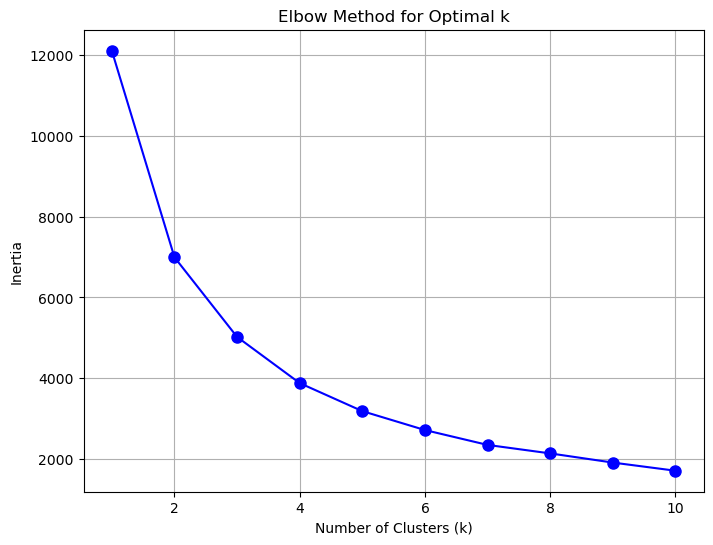

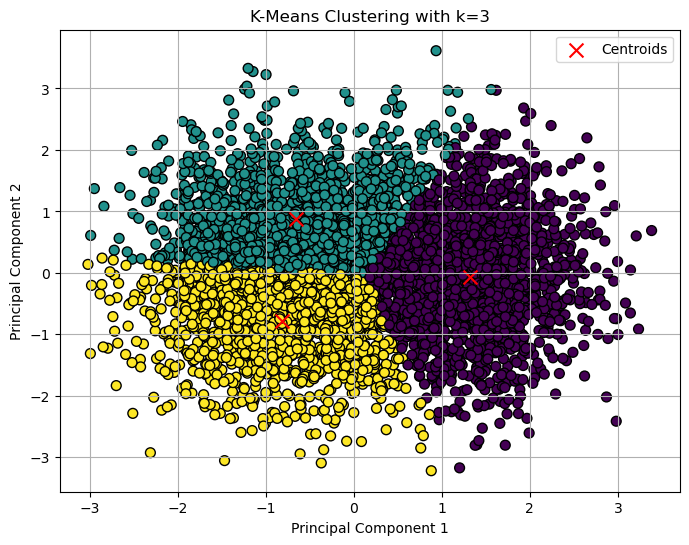

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('C:\\Users\\ydhar\\Downloads\\Usa_Housing.csv') 
# 1. Omit the last attribute (assuming it's unnecessary for clustering)
data = data.iloc[:, :-1]

# 2. Handle Missing Values (impute with mean for numerical features)
data.fillna(data.mean(), inplace=True)

# 3. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 4. Remove Outliers using Z-score method
z_scores = stats.zscore(scaled_data)
filtered_data = scaled_data[(abs(z_scores) < 3).all(axis=1)]

# 5. Dimensionality Reduction using PCA (reducing to 2 components for visualization)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)

# 6. Apply K-Means Clustering and determine the optimal k using the Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph to visualize the optimal k
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Assuming the optimal k is determined by the elbow graph, e.g., k=3
optimal_k = 3  # Replace this value based on elbow graph if different
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data)

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()
